<a href="https://colab.research.google.com/github/christina3099/Titanic-Dataset/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df['Cabin']= train_df['Cabin'].fillna('Unknown')

In [ ]:
train_df['Cabin']

,Cabin
0,Unknown
1,C85
2,Unknown
3,C123
4,Unknown
...,...
886,Unknown
887,B42
888,Unknown
889,C148


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df['Age'].mode()

,Age
0,24.0


In [ ]:
train_df['Age'].median()

28.0

In [ ]:
train_df['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
train_df['Age']= train_df['Age'].fillna(train_df['Age'].median())

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df['Embarked'].mode()

,Embarked
0,S


In [ ]:
train_df['Embarked']= train_df['Embarked'].fillna('S')

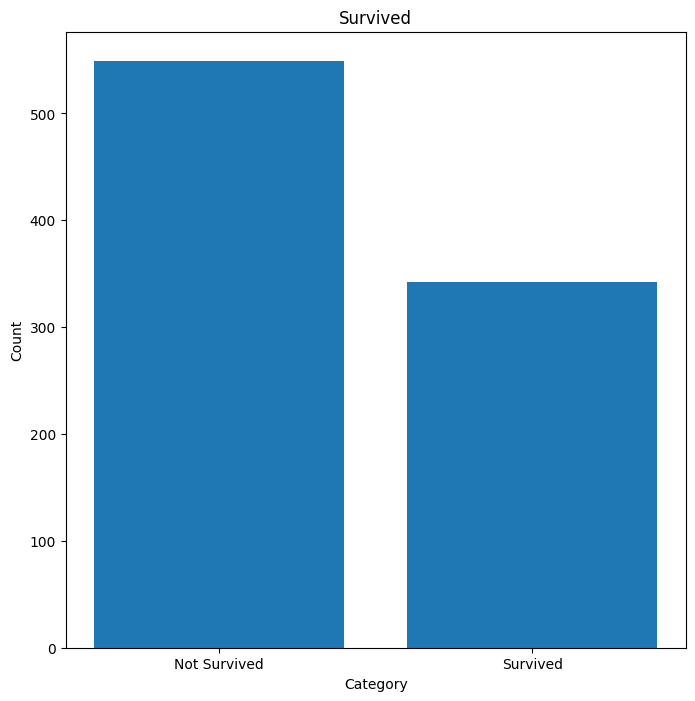

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(train_df['Survived'].value_counts().index, train_df['Survived'].value_counts().values)
plt.title('Survived')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [ ]:
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
survival_ratio = train_df['Survived'].groupby(train_df['Sex']).value_counts()

In [ ]:
survival_ratio

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

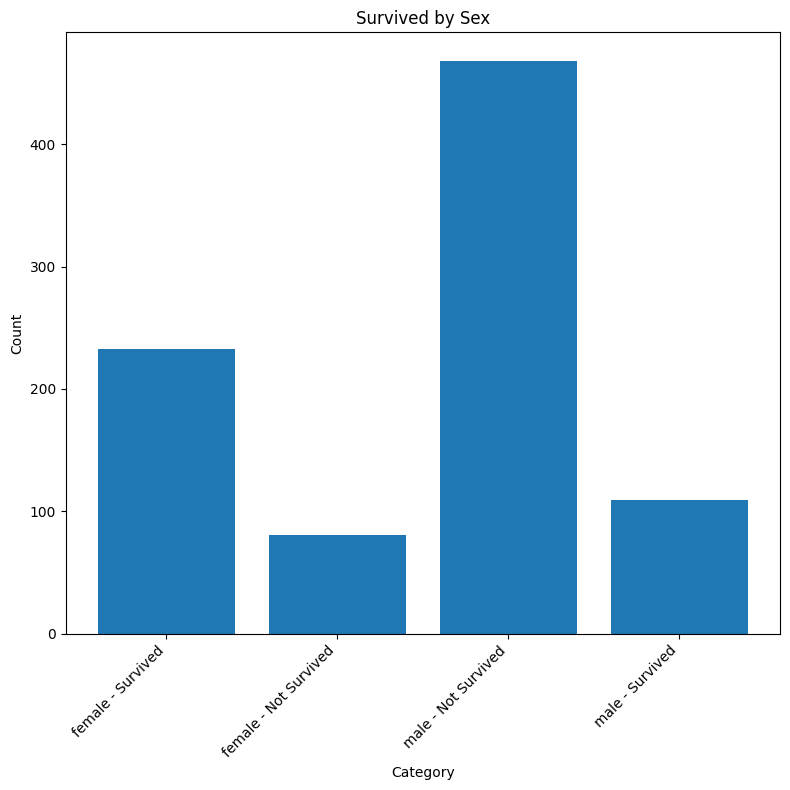

In [ ]:
plt.figure(figsize=(8,8))
labels = [f'{sex} - {"Survived" if survived == 1 else "Not Survived"}' for sex, survived in survival_ratio.index]
plt.bar(labels, survival_ratio.values)
plt.title('Survived by Sex')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_ratio = train_df['Survived'].groupby(train_df['Pclass']).value_counts()

In [ ]:
class_ratio

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '1 - Survived'),
  Text(1, 0, '1 - Not Survived'),
  Text(2, 0, '2 - Not Survived'),
  Text(3, 0, '2 - Survived'),
  Text(4, 0, '3 - Not Survived'),
  Text(5, 0, '3 - Survived')])

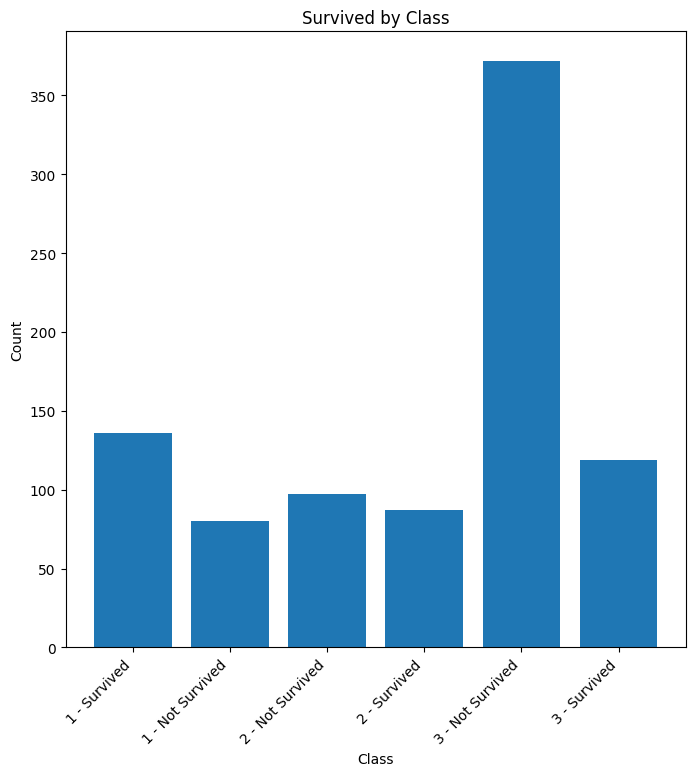

In [ ]:
plt.figure(figsize=(8,8))
labels = [f'{pclass} - {"Survived" if survived == 1 else "Not Survived"}' for pclass, survived in class_ratio.index]
plt.bar(labels, class_ratio.values)
plt.title('Survived by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df['Age'] = train_df['Age'].astype(int)

In [ ]:
train_df['Survived'].groupby(train_df['Age']).value_counts()

Age  Survived
0    1           7
1    1           5
     0           2
2    0           7
     1           3
                ..
66   0           1
70   0           3
71   0           2
74   0           1
80   1           1
Name: count, Length: 124, dtype: int64

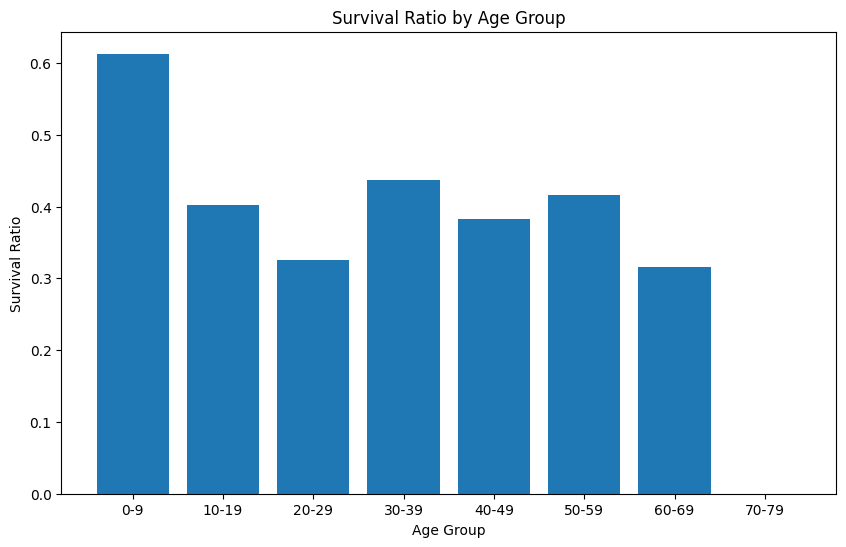

In [ ]:
# Create age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Calculate survival ratio by age group
survival_ratio_age = train_df.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack().fillna(0)
survival_ratio_age['Survived'] = survival_ratio_age[1] # Get the ratio of survived

# Plot the survival ratio by age group
plt.figure(figsize=(10, 6))
plt.bar(survival_ratio_age.index, survival_ratio_age['Survived'])
plt.title('Survival Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Ratio')
plt.show()

In [ ]:
port_ratio = train_df['Survived'].groupby(train_df['Embarked']).value_counts()

In [ ]:
port_ratio

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

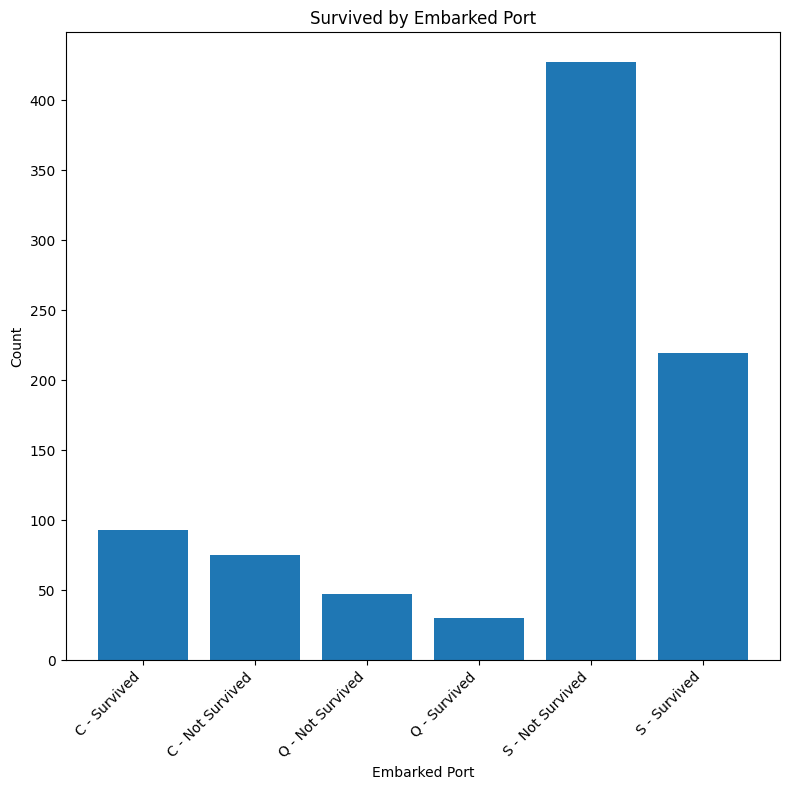

In [ ]:
plt.figure(figsize=(8,8))
labels = [f'{embarked} - {"Survived" if survived == 1 else "Not Survived"}' for embarked, survived in port_ratio.index]
plt.bar(labels, port_ratio.values)
plt.title('Survived by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       891 non-null    int64   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    object  
 8   AgeGroup  890 non-null    category
dtypes: category(1), float64(1), int64(5), object(2)
memory usage: 57.0+ KB


In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
high_fare_passengers = train_df[train_df['Fare'] > 300.]
display(high_fare_passengers)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
258,1,1,female,35,0,0,512.3292,C,30-39
679,1,1,male,36,0,1,512.3292,C,30-39
737,1,1,male,35,0,0,512.3292,C,30-39


In [ ]:
train_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [ ]:
train_df.duplicated().sum()

np.int64(120)

In [ ]:
duplicate = train_df[train_df.duplicated()]

In [ ]:
duplicate

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
47,1,3,female,28,0,0,7.7500,Q,20-29
55,1,1,male,28,0,0,35.5000,S,20-29
76,0,3,male,28,0,0,7.8958,S,20-29
77,0,3,male,28,0,0,8.0500,S,20-29
87,0,3,male,28,0,0,8.0500,S,20-29
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26,0,0,7.8958,S,20-29
877,0,3,male,19,0,0,7.8958,S,10-19
878,0,3,male,28,0,0,7.8958,S,20-29
884,0,3,male,25,0,0,7.0500,S,20-29


In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
train_df['Sex'] = LE.fit_transform(train_df['Sex'])

In [ ]:
train_df['Embarked'] = LE.fit_transform(train_df['Embarked'])

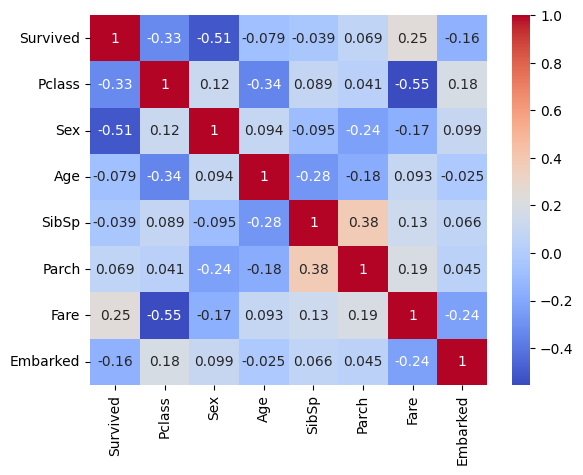

In [ ]:
numeric_df = train_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2,stratify=train_df['Survived'],random_state=42)